# How to develop a GAN for genearting MNIST handwritten Digits 
This tutorial is divided into seven parts; they are:

</br> 1.MNIST Handwritten Digit Dataset
</br> 2.How to Define and Train the Discriminator Model
</br> 3.How to Define and Use the Generator Model
</br> 4.How to Train the Generator Model
</br> 5.How to Evaluate GAN Model Performance
</br> 6.Complete Example of GAN for MNIST
</br> 7.How to Use the Final Generator Model to Generate Images

# 1. Liste de notions à maitriser 
</br> Listes, Dictionnaires 
</br> Boucles avancées
</br> Methodes Py Traitement image

# 2. Import Libraries 

In [27]:
# For Neural Network 
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, LeakyReLU
from keras.optimizers import Adam


# For other
from matplotlib import pyplot
from numpy import random, zeros, expand_dims, ones



# 3. Load MNIST Dataset

In [7]:
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()


In [8]:
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


60 000 images de 28*28 pixels 

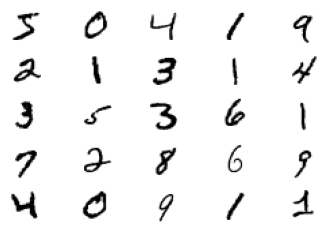

In [9]:
# plot raw pixel data
for i in range(25): 
  #define subplot 
  pyplot.subplot(5,5,1+i)
  #turn off axis 
  pyplot.axis('off')
  #plot raw pixel  data
  pyplot.imshow(trainX[i],cmap='gray_r')
pyplot.show()


In [10]:
# images in trainX is labelled by trainy : 
trainy[0]

5

# 4. Define and Train the discriminator model 

In [23]:
#load and prepare mnist images :
def load_real_samples():
    (trainX,_), (_,_)= load_data()
    X = expand_dims(trainX,axis=-1)
    X = X.astype('float32')
    X=X/255.0
    return X 


In [24]:
# select real samples (ie class 1)
def generate_real_samples(dataset, n_samples):
	# choose random instances : a revoir car pas bien compris
	ix = random.randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

In [25]:
#generate fake samples (ie class 0)
def generate_fake_samples(n_samples):
    X = random.rand(28*28*n_samples)
    X = X.reshape((n_samples,28,28,1))
    y=zeros((n_samples,1))
    return X, y

In [26]:
def define_discriminator(in_shape=(28,28,1)) :
  model = Sequential()
  model.add(Conv2D(64,(3,3), strides=(2,2), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1,activation='sigmoid'))
  #compile model 
  opt = Adam(lr=0.0002,beta_1=0.5)
  model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'] )
  return model

In [28]:
#train the discriminator :
#train for fake and real separaretely
def train_discriminator (model, dataset, n_iter=100, n_batch=256):
    half_batch=int(n_batch/2)
    for i in range(n_iter):
        #get randomly selected 'real' samples 
        X_real, y_real = generate_real_samples(dataset, half_batch)
        #update discriminator on real samples 
        _,real_acc= model.train_on_batch(X_real,y_real)
        #generate 'fake' examples 
        X_fake, y_fake = generate_fake_samples(half_batch)
        #update discriminator on fake samples : 
        _, fake_acc= model.train_on_batch(X_fake, y_fake)
        #summarize performance :
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))
        #accuracy = correctly detected / total 


In [29]:
#define discrimnator 
model = define_discriminator()
#load image data 
dataset = load_real_samples()
#fit model 
train_discriminator(model,dataset)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

>1 real=36% fake=10%
>2 real=57% fake=45%
>3 real=46% fake=87%
>4 real=50% fake=100%
>5 real=37% fake=99%
>6 real=38% fake=100%
>7 real=41% fake=100%
>8 real=44% fake=100%
>9 real=41% fake=100%
>10 real=48% fake=100%
>11 real=41% fake=100%
>12 real=51% fake=100%
>13 real=49% fake=100%
>14 real=61% fake=100%
>15 real=70% fake=100%
>16 real=73% fake=100%
>17 real=78% fake=100%
>18 real=86% fake=100%
>19 real=87% fake=100%
>20 real=85% fake=100%
>21 real=92% fake=100%
>22 real=95% fake=100%
>23 real=93% fake=100%
>24 real=98% fake=100%
>25 real=98% fake=100%
>26 real=98% fake=100%
>27 real=98% fake=100%
>28 real=100% fake=100%
>29 real=100% fake=100%
>30 real=100% fake=100%
>31 real=100% fake=100%
>32 real=99% fake=100%
>33 real=100% fake=100%
>34 real=100% fake=100%
>35 real=100% fake=100%
>36 real=100% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=1

# 5.How to define and use the Generator Model 

In [36]:
# add new libraries 
from keras.layers import Reshape, Conv2D, Conv2DTranspose

#define the standalone generator model 
def define_generator(latent_dim):
    model = Sequential()
    #foundation for 7*7 image
    n_nodes= 128*7*7
    model.add(Dense(n_nodes,input_dim=latent_dim))
    #upsample to 14*14
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #upsample to 28*28
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1,(7,7), activation='sigmoid', padding='same'))
    return model 
    

In [38]:
# define the combined genrator and discrminator for updating the genrator 
def define_gan(g_model, d_model):
    #make weights in the discriminator not trainable 
    d_model.trainable = False
    #connect them
    model=Sequential()
    #add the generator 
    model.add(g_model)
    #add the discrminator 
    model.add(d_model)
    # compile 
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile (loss='binary_crossentropy', optimizer=opt) 
    return model

In [ ]:
#size of the latent space 
latent_dim = 100
#create the discrminator 
d_model = define_discriminator()
#create the geneator 
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
gan_model.summary()


# 6. Complete example 



In [2]:
# import libraries 
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model


# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model


# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model


# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input


# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=2, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)


######################################################################################
#size of the latent space
latent_dim = 100
#create the discrminator 
d_model = define_discriminator()
#create the gan 
g_model=define_generator(latent_dim)
#create the gan 
gan_model = define_gan(g_model,d_model)
#load image data 
dataset = load_real_samples()
#train model 
train(g_model,d_model,gan_model,dataset,latent_dim)


>1, 1/234, d=0.695, g=0.714


C:\Users\emanu\anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 2/234, d=0.689, g=0.737
>1, 3/234, d=0.675, g=0.758
>1, 4/234, d=0.670, g=0.777
>1, 5/234, d=0.661, g=0.800
>1, 6/234, d=0.653, g=0.812
>1, 7/234, d=0.648, g=0.826
>1, 8/234, d=0.642, g=0.840
>1, 9/234, d=0.637, g=0.848
>1, 10/234, d=0.632, g=0.839
>1, 11/234, d=0.639, g=0.827
>1, 12/234, d=0.636, g=0.810
>1, 13/234, d=0.643, g=0.782
>1, 14/234, d=0.644, g=0.760
>1, 15/234, d=0.645, g=0.743
>1, 16/234, d=0.646, g=0.730
>1, 17/234, d=0.642, g=0.718
>1, 18/234, d=0.641, g=0.712
>1, 19/234, d=0.631, g=0.707
>1, 20/234, d=0.627, g=0.704
>1, 21/234, d=0.618, g=0.702
>1, 22/234, d=0.615, g=0.701
>1, 23/234, d=0.607, g=0.701
>1, 24/234, d=0.596, g=0.700
>1, 25/234, d=0.584, g=0.700
>1, 26/234, d=0.580, g=0.700
>1, 27/234, d=0.572, g=0.700
>1, 28/234, d=0.557, g=0.700
>1, 29/234, d=0.552, g=0.700
>1, 30/234, d=0.548, g=0.701
>1, 31/234, d=0.530, g=0.701
>1, 32/234, d=0.521, g=0.702
>1, 33/234, d=0.510, g=0.702
>1, 34/234, d=0.498, g=0.703
>1, 35/234, d=0.497, g=0.704
>1, 36/234, d=0.482, g

# 7. How to use the final Generator model.h5

## 7.1. Discriminator 

In [9]:
# 
X_real, y_real = generate_real_samples(dataset, n_samples=100)
_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)

In [5]:
# 
x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples=100)
_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)


In [10]:
# summarize discriminator performance
print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))


>Accuracy real: 70%, fake: 67%


## 7.2. Generator 

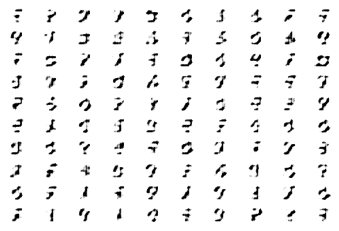

In [11]:
n=10
examples = x_fake
for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')


In [12]:
filename = 'generator_model_2ep.h5'
g_model.save(filename)

In [13]:
filename = 'discriminator_model_2ep.h5'
d_model.save(filename)